In [5]:
#https://quantbrasil.com.br/como-calcular-o-estocastico-lento-utilizando-python

In [32]:
%matplotlib notebook
%matplotlib inline

import trendet
import investpy
import yfinance as yf
import mplfinance as fplt

import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from datetime import datetime
from subprocess import check_output

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Leitura da da base de dados API
cardano = yf.download("ADA-USD", start="2000-01-01", end="2021-10-1")

[*********************100%***********************]  1 of 1 completed


> Criado na década de 50 pelo americano George Lane, o indicador Estocástico faz parte da família dos osciladores de momento, muito utilizados como sinalizadores de reversão de tendência na análise técnica.

> O métado Estocástico mede a relação entre o preço atual com as máximas e mínimas de um período pré-determinado. Originalmente, utilizava-se 14 períodos, mas atualmente tornou-se comum sua utilização em intervalos mais curtos, como em uma janela de 8 períodos.

> Dito isso, nós definimos o conceito de **Estocástico Rápido** (%**K**)(\%**K**)(%**K**), usualmente acompanhado de sua média móvel aritmética de **n períodos** (%**D**)(\%**D**)(%**D**).

> Essas curvas são calculadas da seguinte maneira:

<img src="estocastico.PNG">

* PA = Preço Atual;
* Min(n) = Mínima em n períodos;
* Max(n) = Máxima em n períodos;
* MMA = Média Móvel Aritmética.

### Estocástico Lento
> Para calcular o Estocástico Lento, tudo que precisamos fazer é calcular a média móvel aritmética das curvas acima. Ou seja: 

<img src="estocastico1.PNG">

* Matematicamente:

<img src="estocastico2.PNG">

* **O Estocástico Lento suaviza as oscilações de preço e, por conta disso, é bastante utilizado**

> Além disso, análogo ao IFR, esse indicador também varia em uma escala de 0 a 100, apresentando regiões que caracterizam estados de sobrecompra e sobrevenda (tipicamente acima de 80 e abaixo de 20).

* **Vamos criar uma função, em Python, para calculá-lo em apenas 3 passos:**

>1. Calcular o Estocástico Rápido;
>2. Calcular o Estocástico Lento;
>3. Criar a função juntando os passos acima.

#### Calculando o Estocástico Rápido

>Calcularemos as curvas **%K** e **%D**, que caracterizam o estocástico rápido, a partir das fórmulas descritas anteriormente.

Para o cálculo da curva **%K**, precisamos primeiro isolar as (**High**) máximas e (**Low**) mínimas do período escolhido. Isto é, a cada linha isolaremos o valor das colunas dentre as n linhas anteriores.

In [46]:
n = 8 
n_highest_high = data["High"].rolling(n).max() # Leitura do valor máxima
n_lowest_low = data["Low"].rolling(n).min() # Leitura do valor mínima

> Fórmula do Estocástico e teremos os valores para curva **%K** do estocástico rápido.

In [47]:
data["%K"] = (
    (data["Adj Close"] - n_lowest_low) /
    (n_highest_high - n_lowest_low)
) * 100

data.head(2)

,Open,High,Low,Close,Adj Close,Volume,Cap_Mercado,%K,%D,Slow %K,Slow %D
Date,,,,,,,,,,,
2019-01-10,0.052049,0.054636,0.042756,0.044529,0.044529,91162431,1.154513e+09,NaN,63.435253,63.435253,NaN
2019-01-11,0.044322,0.045157,0.042749,0.044147,0.044147,35963011,1.144607e+09,NaN,41.767785,41.767785,NaN


> Com os valores de **%K** definidos, podemos calcular a **média móvel aritmética** para obtermos %%D. A função utilizada para isso é a mesma (**rolling**), dessa vez associada à função **mean**.

In [48]:
data["%D"] = data['%K'].rolling(3).mean()
data.head(2)

,Open,High,Low,Close,Adj Close,Volume,Cap_Mercado,%K,%D,Slow %K,Slow %D
Date,,,,,,,,,,,
2019-01-10,0.052049,0.054636,0.042756,0.044529,0.044529,91162431,1.154513e+09,NaN,NaN,63.435253,NaN
2019-01-11,0.044322,0.045157,0.042749,0.044147,0.044147,35963011,1.144607e+09,NaN,NaN,41.767785,NaN


> Feito isso, removeremos todas as linhas contendo NaN.

In [49]:
data.dropna(inplace=True)
data.head(2)

,Open,High,Low,Close,Adj Close,Volume,Cap_Mercado,%K,%D,Slow %K,Slow %D
Date,,,,,,,,,,,
2019-01-19,0.044275,0.046441,0.043984,0.045750,0.045750,23657402,1.186172e+09,89.583957,65.678672,65.678672,47.659267
2019-01-20,0.045674,0.045981,0.042552,0.043477,0.043477,26755022,1.127226e+09,55.321061,71.731137,71.731137,61.466321


#### Calculando o Estocástico Lento
> O Estocástico Lento é ainda mais simples de se calcular, uma vez que ele é oriundo das curvas do estocástico rápido.

> Como visto anteriormente, a curva **%K lento** (**%KL**) nada mais é do que a curva suavizada através da **média móvel de %K rápido (%K)**. Em outras palavras,**%KL** é igual a **%D rápido** (**%D**).

>A **curva %D lento** (**%DL**), por sua vez, nada mais é do que a **média móvel aritmética** de **%KL**

In [50]:
data["Slow %K"] = data["%D"]
data["Slow %D"] = data["Slow %K"].rolling(3).mean()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Cap_Mercado,%K,%D,Slow %K,Slow %D
Date,,,,,,,,,,,
2019-01-19,0.044275,0.046441,0.043984,0.045750,0.045750,23657402,1.186172e+09,89.583957,65.678672,65.678672,NaN
2019-01-20,0.045674,0.045981,0.042552,0.043477,0.043477,26755022,1.127226e+09,55.321061,71.731137,71.731137,NaN
2019-01-21,0.043541,0.043671,0.042534,0.042937,0.042937,16583935,1.113232e+09,43.819136,62.908051,62.908051,66.772620
2019-01-22,0.042889,0.044080,0.041876,0.043578,0.043578,22963399,1.129838e+09,37.283664,45.474620,45.474620,60.037936
2019-01-23,0.043548,0.044112,0.042695,0.042900,0.042900,15241102,1.112275e+09,22.431549,34.511450,34.511450,47.631374


> através da função axhline para delimitar as regiões de sobrecompra e sobrevenda

(0.0, 100.0)

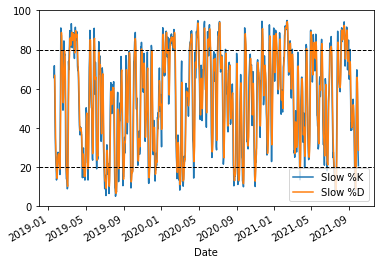

In [51]:
data[["Slow %K", "Slow %D"]].plot()
plt.axhline(y=20.0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=80.0, color='black', linestyle='--', linewidth=1)
plt.ylim(0, 100.0)

> plotar o estocástico juntamente com o gráfico do preço de fechamento.
> através da função plot_stochastic, que recebe como argumento apenas o dataframe que contém as colunas necessárias (Adj Close, Slow %K e Slow %D).

In [52]:
def plot_stochastic(data):
    fig, (ax1, ax2) = plt.subplots(
        nrows=2,
        sharex=True,
        figsize=(12, 8),
        gridspec_kw={"height_ratios": [3, 1]})

    ax1.plot(data.index, data["Adj Close"], label="Fechamento")
    ax1.legend()

    ax2.plot(data.index, data[["Slow %K"]], label='Estocástico Lento')
    ax2.plot(data.index, data[["Slow %D"]], label='MMA(3)', linewidth=1)
    ax2.axhline(y=80, color='black', linestyle='--', linewidth=1)
    ax2.axhline(y=20, color='black', linestyle='--', linewidth=1)
    ax2.set_ylim(0, 100)
    ax2.legend()

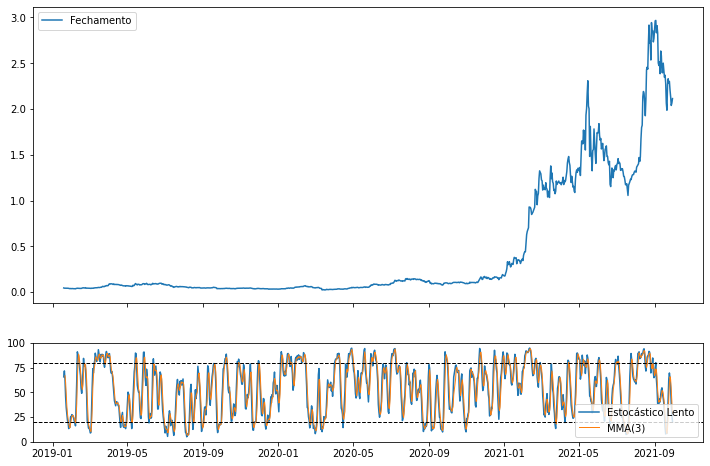

In [53]:
plot_stochastic(data)

#### Criando uma função para o cálculo do Estocástico
Finalmente, podemos juntar tudo que fizemos até agora em uma função stochastic, que retornará o dataframe selecionado com as colunas %K, %D, Slow %K e Slow %D.

Essa função receberá 3 argumentos:

df: o dataframe que se deseja adicionar as colunas acima (lembrando que ele deve conter as colunas High, Low e Adj Close);
k_window: janela móvel que se deseja calcular o estocástico (será de 8 períodos, por padrão);
mma_window: janela móvel que se deseja calcular média móvel aritmética (será de 3 períodos, por padrão).

In [54]:
def stochastic(data, k_window=8, mma_window=3):
    
    n_highest_high = data["High"].rolling(k_window).max()
    n_lowest_low = data["Low"].rolling(k_window).min()
    
    data["%K"] = (
        (data["Adj Close"] - n_lowest_low) / 
        (n_highest_high - n_lowest_low)
    ) * 100
    data["%D"] = data['%K'].rolling(mma_window).mean()
    
    data["Slow %K"] = data["%D"]
    data["Slow %D"] = data["Slow %K"].rolling(mma_window).mean()
    
    return data 

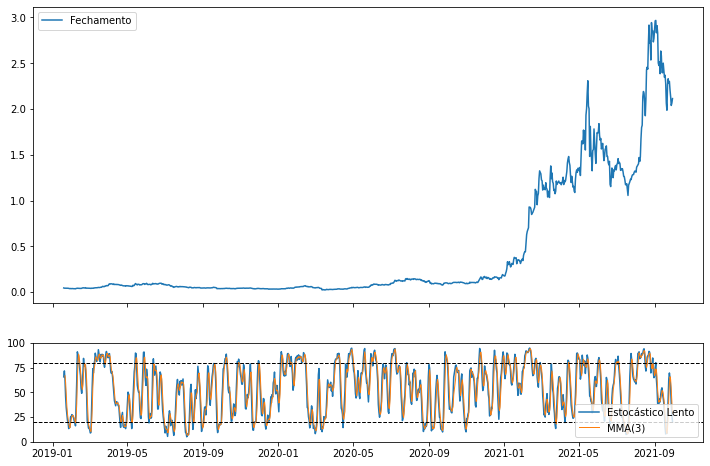

In [55]:
plot_stochastic(data)

#### Conclusão
O indicador Estocástico é amplamente utilizado em setups a fim de se beneficiar das oscilações do mercado, embarcando no início de uma perna, seja ela de alta ou de baixa.

In [44]:
ticker = "BTC-USD"
petr4_df = yf.download(ticker, start="2000-01-01", end="2021-10-1").copy()[["High", "Low", "Adj Close"]]
stochastic(petr4_df)

[*********************100%***********************]  1 of 1 completed


,High,Low,Adj Close,%K,%D,Slow %K,Slow %D
Date,,,,,,,
2014-09-17,468.174011,452.421997,457.334015,NaN,NaN,NaN,NaN
2014-09-18,456.859985,413.104004,424.440002,NaN,NaN,NaN,NaN
2014-09-19,427.834991,384.532013,394.795990,NaN,NaN,NaN,NaN
2014-09-20,423.295990,389.882996,408.903992,NaN,NaN,NaN,NaN
2014-09-21,412.425995,393.181000,398.821014,NaN,NaN,NaN,NaN
2014-09-22,406.915985,397.130005,402.152008,NaN,NaN,NaN,NaN
2014-09-23,441.557007,396.196991,435.790985,NaN,NaN,NaN,NaN
2014-09-24,436.112000,421.131989,423.204987,46.236310,NaN,NaN,NaN
2014-09-25,423.519989,409.467987,411.574005,37.388014,NaN,NaN,NaN


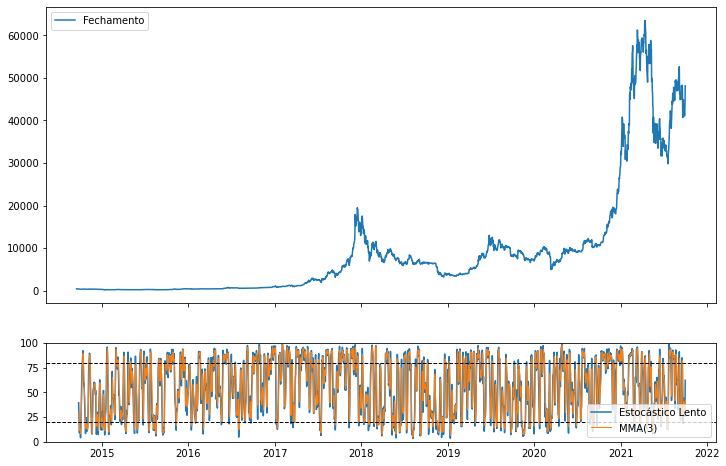

In [29]:
plot_stochastic(petr4_df)
